In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import sklearn.metrics 


In [2]:
radar = pd.read_csv(r"D:\UIUC Academics\SEM3 UIUC\ATMS 523\Assignment5\machine-learning-1-pranjaliborse2\homework\radar_parameters.csv")

In [13]:
radar

,Unnamed: 0,Zh (dBZ),Zdr (dB),Ldr (dB),Kdp (deg km-1),Ah (dBZ/km),Adr (dB/km),R (mm/hr)
0,0,23.144878,0.418637,-41.757733,0.005395,0.000290,0.000012,2.393520
1,1,22.737156,0.322850,-43.772069,0.005194,0.000360,0.000012,3.502699
2,2,26.869826,0.330948,-43.577399,0.013385,0.000903,0.000030,8.627561
3,3,28.540561,0.399480,-42.139731,0.018872,0.001036,0.000043,8.424447
4,4,30.500127,0.543758,-39.763087,0.027438,0.001157,0.000064,8.189291
...,...,...,...,...,...,...,...,...
18964,18964,31.515997,0.579955,-39.244229,0.034048,0.001417,0.000080,10.648020
18965,18965,29.993334,0.567935,-39.399188,0.024134,0.001032,0.000057,7.981875
18966,18966,31.685913,0.655681,-38.375696,0.033971,0.001165,0.000081,6.822691
18967,18967,32.980096,0.768586,-37.166218,0.043117,0.001285,0.000105,6.801169


In [3]:
X_radar = radar.drop(['R (mm/hr)','Unnamed: 0'],axis=1)
y_radar = radar['R (mm/hr)']

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_radar, y_radar, test_size=0.3,
                                                random_state=1)

In [6]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
ymodel_test = model.predict(Xtest)

In [7]:
from scipy.stats import pearsonr
ymodel_train = model.predict(Xtrain)
print('R^2 train-',pearsonr(ymodel_train, ytrain)[0])
rmse_train = math.sqrt(sklearn.metrics.mean_squared_error(ymodel_train, ytrain))
print('RMSE train-',rmse_train)

R^2 train- 0.9938291069837699
RMSE train- 0.9411927035424521


R^2 test- 0.994879570498459
RMSE test- 0.8922106275440661


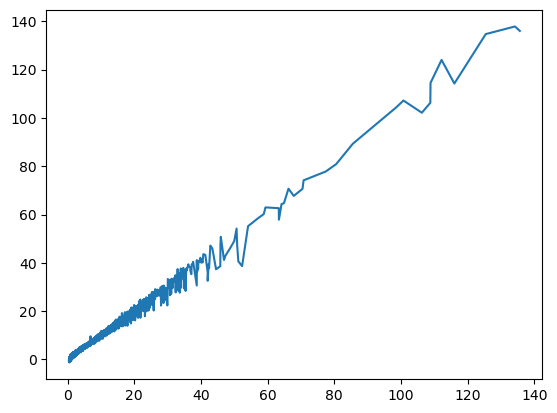

In [8]:

test,predict = zip(*sorted(zip(ytest,ymodel_test)))
plt.plot(test,predict)
print('R^2 test-',pearsonr(ymodel_test,ytest)[0])
rmse_test = math.sqrt(sklearn.metrics.mean_squared_error(ymodel_test,ytest))
print('RMSE test-',rmse_test)

In [9]:
R_formula = (10**(radar['Zh (dBZ)']/10)/200)**(1/1.6)

In [10]:
 
print('R^2 formula-',pearsonr(R_formula,radar['R (mm/hr)'])[0])
rmse_formula = math.sqrt(sklearn.metrics.mean_squared_error(R_formula,radar['R (mm/hr)']))
print('RMSE formula-',rmse_formula)


R^2 formula- 0.6797968431930554
RMSE formula- 7.157590840042378


### Comparison of baseline prediction with linear regression model- 
From the values printed above, it is clear that model built using training dataset outperforms the baseline prediction of rain rate using the formula in terms of both R^2 and RMSE. 

In [11]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
param_grid = {'polynomialfeatures__degree': np.arange(7)}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [12]:
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6])})

In [13]:
grid.best_params_

{'polynomialfeatures__degree': 3}

In [14]:
ytrain.shape

(13278,)

In [15]:
model = grid.best_estimator_
ypoly = model.fit(Xtrain, ytrain).predict(Xtest)


R^2 polyreg 0.9999912206736943
RMSE poly- 0.036873415359347766


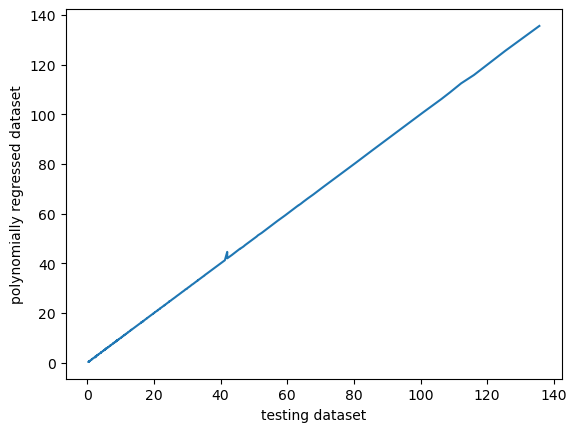

In [16]:
test,poly = zip(*sorted(zip(ytest,ypoly)))
plt.plot(test,poly)
plt.xlabel('testing dataset')
plt.ylabel('polynomially regressed dataset')
print('R^2 polyreg',pearsonr(ypoly,ytest)[0])
rmse_poly = math.sqrt(sklearn.metrics.mean_squared_error(ypoly,ytest))
print('RMSE poly-',rmse_poly)

### Comparison of polynomial and linear regression model-
From the values and plot, it is clear that polynomial model outperforms linear regression model as its R^2 (0.9999960125370404) is greater than R^2 (0.9952895658055059) of linear regression and RMSE ~ 0.025 is smaller than RMSE ~ 0.88 of linear regression

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

randomgrid = {'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],  
                'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4],  
                'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

forest = RandomForestRegressor()
forest_random = RandomizedSearchCV(estimator = forest, param_distributions = randomgrid, n_iter = 100, cv = 3, 
                                    verbose=2, random_state=42, n_jobs = -1)
forest_random.fit(Xtrain, ytrain)

yfit = forest_random.predict(Xtest)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [70]:
print('R^2 RandomForest-',pearsonr(yfit,ytest)[0])
rmse_rf = math.sqrt(sklearn.metrics.mean_squared_error(yfit,ytest))
print('RMSE RandomForest-',rmse_rf)

R^2 RandomForest- 0.9930881789026568
RMSE RandomForest- 1.0586615570017117


### Comparison of Random Forest model with all others-
We can only beat the baseline prediction using random forest model in terms of both R^2 and RMSE but since the value of R^2 is slightly smaller than both linear and polynomial regression models and RMSE is larger than both the models, we cannot beat these two models with the best optimized Random Forest Regressor. But even if it doesn't outperform these two models, it performs well as evident from R^2 value.